# `Alura`
## `Formação Machine Learning`
## `Curso 01 - Machine Learning: Classificação com SKLearn`
---
## `Projeto 04: Car Prices (Vendidos ou Não)`

!pip install graphviz

In [1]:
import pandas as pd

dados = pd.read_csv('datasets/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
a_renomear = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_trocar = {
    "no": 0,
    "yes": 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [5]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [6]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [7]:
X = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com {len(treino_X)} elementos e testaremos com {len(teste_X)} elementos')

modelo = LinearSVC()
modelo.fit(treino_X, treino_y)
previsoes = modelo.predict(teste_X)

acuracia = accuracy_score(teste_y, previsoes)
print(f'Acurácia: {acuracia*100:.2f}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia: 46.88%


C:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(treino_X, treino_y)
acuracia = dummy_stratified.score(teste_X, teste_y)

# acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'Acurácia (stratified): {acuracia*100:.2f}%')

Acurácia (stratified): 52.44%


In [9]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_X, treino_y)
acuracia = dummy_mostfrequent.score(teste_X, teste_y)

print(f'Acurácia (mostfrequent): {acuracia*100:.2f}%')

Acurácia (mostfrequent): 58.00%


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_X, raw_teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com {len(treino_X)} elementos e testaremos com {len(teste_X)} elementos')

scaler = StandardScaler()
scaler.fit(raw_treino_X)
treino_X = scaler.transform(raw_treino_X)
teste_X = scaler.transform(raw_teste_X)

modelo = SVC()
modelo.fit(treino_X, treino_y)
previsoes = modelo.predict(teste_X)

acuracia = accuracy_score(teste_y, previsoes)
print(f'Acurácia: {acuracia*100:.2f}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia: 77.48%


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_X, raw_teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com {len(treino_X)} elementos e testaremos com {len(teste_X)} elementos')

'''

scaler = StandardScaler()
scaler.fit(raw_treino_X)
treino_X = scaler.transform(raw_treino_X)
teste_X = scaler.transform(raw_teste_X)

'''

# Em árvores de decisão, não é necessário fazer o escalonamento (ou normalização) dos dados de treino e teste

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(raw_treino_X, treino_y)
previsoes = modelo.predict(raw_teste_X)

acuracia = accuracy_score(teste_y, previsoes)
print(f'Acurácia: {acuracia*100:.2f}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia: 79.32%


In [12]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


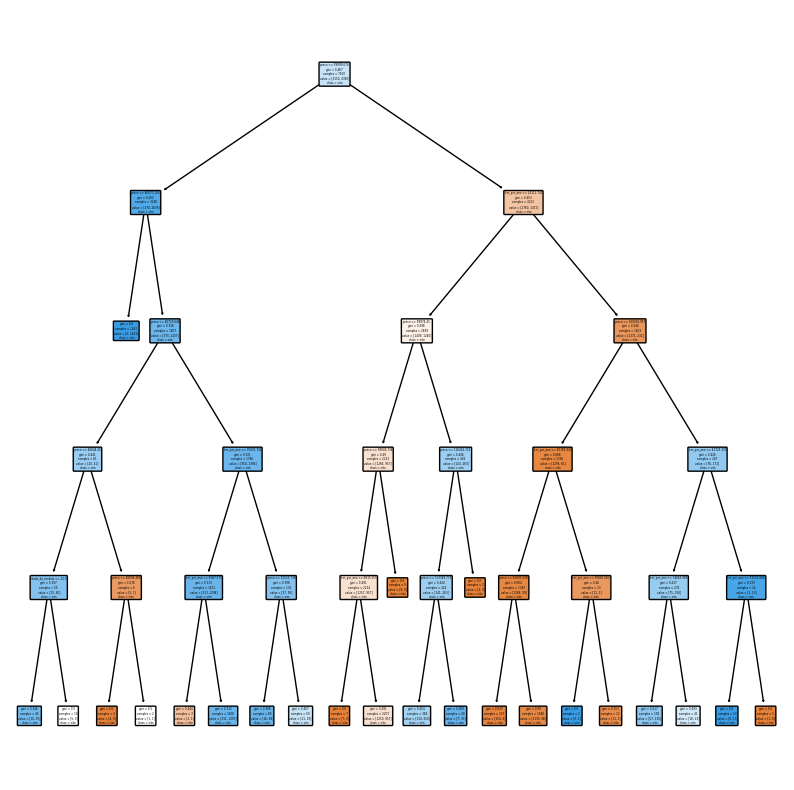

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt 

previsores = ['preco', 'idade_do_modelo', 'km_por_ano']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names=["não", "sim"], filled=True, rounded=True);